# ✅ Test Environnement Deep Learning

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

from tqdm import tqdm

plt.style.use('dark_background')  # 🕶️ Dark mode
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

dimension de X:  (2, 100)
dimension de y:  (1, 100)


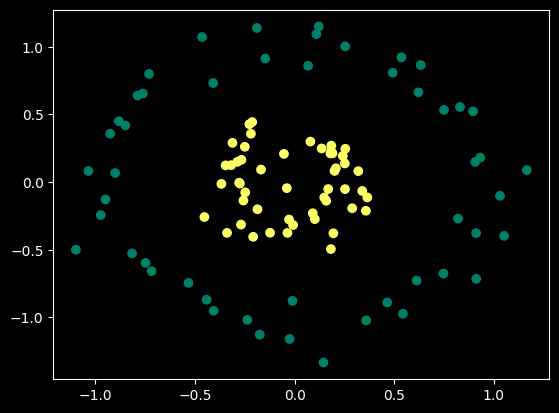

In [25]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

X = X.T
y = y.reshape(1, y.shape[0])

print('dimension de X: ', X.shape)
print('dimension de y: ', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [173]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parametres
    
    
    

In [141]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    # couche 1
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-np.clip(Z1, -500, 500)))
    # couche 2
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-np.clip(Z2, -500, 500)))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [142]:
def log_loss(y, A):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))
    

In [143]:
def back_propagation(X, y, activations, parametres):

    W2 = parametres['W2']

    A1 = activations['A1']
    A2 = activations['A2']

    m = y.shape[1] # Nbre des lignes de la matrice y

    # Couche 2
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)


    # Couche 1
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)


    gradients = {
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2
    }
    return gradients
    



In [144]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return parametres

In [176]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 > 0.5
       

In [146]:
from sklearn.metrics import accuracy_score

In [195]:
def neural_network(X_train, y_train, n1=32, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    
    

    for i in tqdm(range(n_iter)):
        # activations
        activations = forward_propagation(X_train, parametres)

        # mise à jour
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)

        if i % 10:
            
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten()) # applatir les matrices
            train_acc.append(current_accuracy)            
            
            
    # Grille pour l'affichage de la frontière de décision
    xx, yy = np.meshgrid(np.linspace(X_train[0,:].min()-1, X_train[0,:].max()+1, 200),
                         np.linspace(X_train[1,:].min()-1, X_train[1,:].max()+1, 200))
    grid_points = np.c_[xx.ravel(), yy.ravel()].T  # shape (2, N)
    
    # Prédictions sur la grille
    Z = predict(grid_points, parametres).reshape(xx.shape)
    
    plt.figure(figsize=(14, 4))
    
    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    
    # Frontière de décision
    plt.subplot(1, 3, 3)
   # Fond coloré : zone de prédiction
    plt.contourf(xx, yy, Z, levels=1, cmap='summer', alpha=0.4)
    
    # Ligne rouge : frontière de décision
    plt.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)
    
    # Données
    plt.scatter(X_train[0, :], X_train[1, :], c=y_train.flatten(), cmap='summer', edgecolor='k')
    
    # Quadrillage
    plt.grid(color='black', linestyle=':', linewidth=0.5)
    plt.xticks(np.arange(-2, 2, 1))
    plt.yticks(np.arange(-2, 2, 1))

    plt.show()

    print("Train accuracy: ", np.max(train_acc))


    return parametres

In [210]:
def neural_network2(X_train, y_train, X_test, y_test, n1=4, learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    test_loss = []
    test_acc = []
    
    

    for i in tqdm(range(n_iter)):
        # activations
        activations = forward_propagation(X_train, parametres)

        # mise à jour
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)

        if i % 10:
            
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten()) # applatir les matrices
            train_acc.append(current_accuracy) 

            # Test
            activations = forward_propagation(X_test, parametres)
            test_loss.append(log_loss(y_test, activations['A2']))
            y_pred = predict(X_test, parametres)
            current_accuracy = accuracy_score(y_test.flatten(), y_pred.flatten()) # applatir les matrices
            test_acc.append(current_accuracy) 
            
            
    
    
    plt.figure(figsize=(14, 4))
    
    #  Train Loss
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()

    #  Train Loss
    plt.subplot(1, 3, 2)
    plt.plot(test_loss, label='test loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 3, 3)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()

    plt.show()

    print("Train accuracy: ", np.max(train_acc))
    print("Test accuracy: ", np.max(test_acc))
    
    

    return parametres

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2376.90it/s]


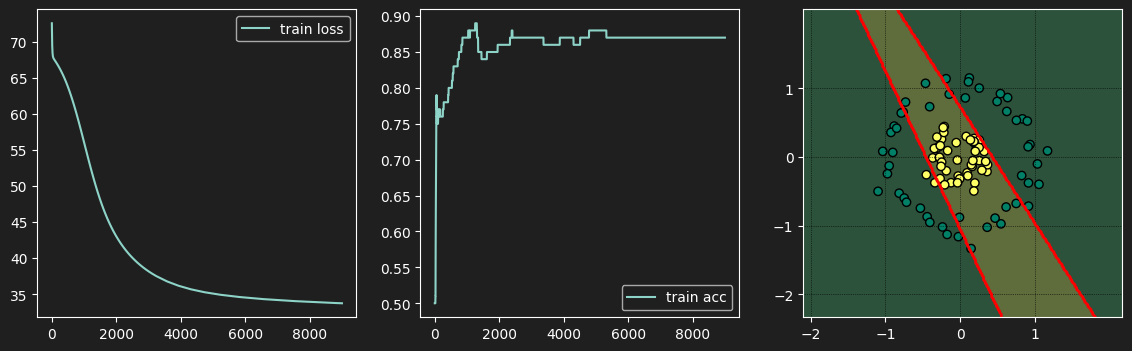

Train accuracy:  0.89


In [198]:
parametres = neural_network(X, y, n1=2, n_iter=10000, learning_rate=0.1)

In [100]:
from utilities import *

In [213]:
X_train, y_train, X_test, y_test = load_data()

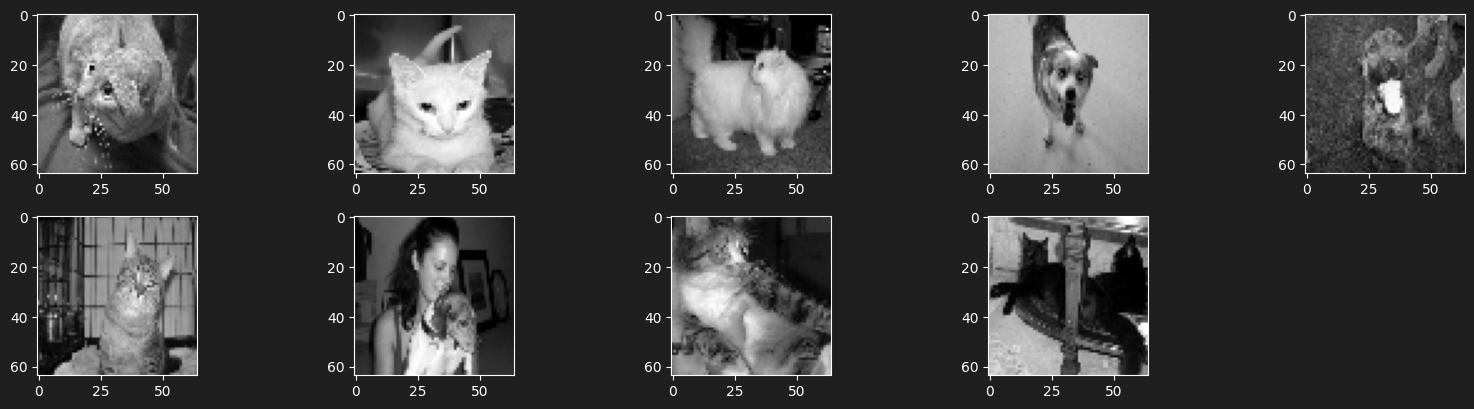

In [214]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap="gray")
    #plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [215]:
X_train, y_train, X_test, y_test = load_data()
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

m_train = 300
m_test = 80

X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [03:13<00:00, 25.78it/s]


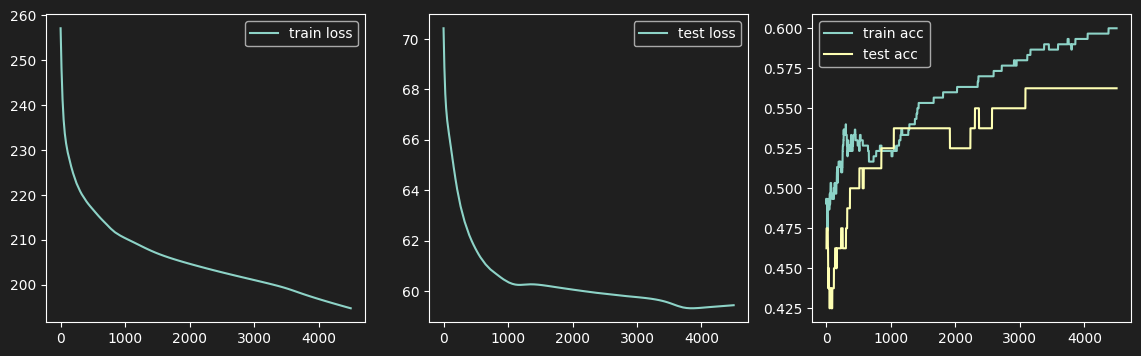

Train accuracy:  0.6
Test accuracy:  0.5625


In [217]:
parametres1 = neural_network2(
    X_train_reshape, y_train, X_test_reshape, y_test,
    n1 = 16, learning_rate = 0.01, n_iter = 5000
)